Lets load required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<div id="about_dataset">
    <h2>About the dataset</h2>
</div>

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case. 

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns. 

The target field, called __custcat__, has four possible values that correspond to the four customer groups, as follows:
  1- Basic Service
  2- E-Service
  3- Plus Service
  4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.


# Load data and Check Basic Details

### Load File -

In [2]:
tele = pd.read_csv('teleCust1000t.csv')
tele.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64,4,5,0,0,2,1
1,3,11,33,1,7,136,5,5,0,0,6,4
2,3,68,52,1,24,116,1,29,0,1,2,3
3,2,33,33,0,12,33,2,0,0,1,1,1
4,2,23,30,1,9,30,1,2,0,0,4,3


### Check Size of Data - 

In [3]:
tele.shape

(1000, 12)

### Check various Data type  

In [4]:
tele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   region   1000 non-null   int64
 1   tenure   1000 non-null   int64
 2   age      1000 non-null   int64
 3   marital  1000 non-null   int64
 4   address  1000 non-null   int64
 5   income   1000 non-null   int64
 6   ed       1000 non-null   int64
 7   employ   1000 non-null   int64
 8   retire   1000 non-null   int64
 9   gender   1000 non-null   int64
 10  reside   1000 non-null   int64
 11  custcat  1000 non-null   int64
dtypes: int64(12)
memory usage: 93.9 KB


### Check Statisticsl info of Data - 

In [5]:
tele.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


### Check the Missing Value in Data - 

In [6]:
tele.isnull().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

<div id="visualization_analysis">
    <h2>Data Visualization and Analysis - 
</div>


#### Check  how many of each class is in our data set 

In [7]:
tele['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

#### Plot a Pair plot and Note down important point

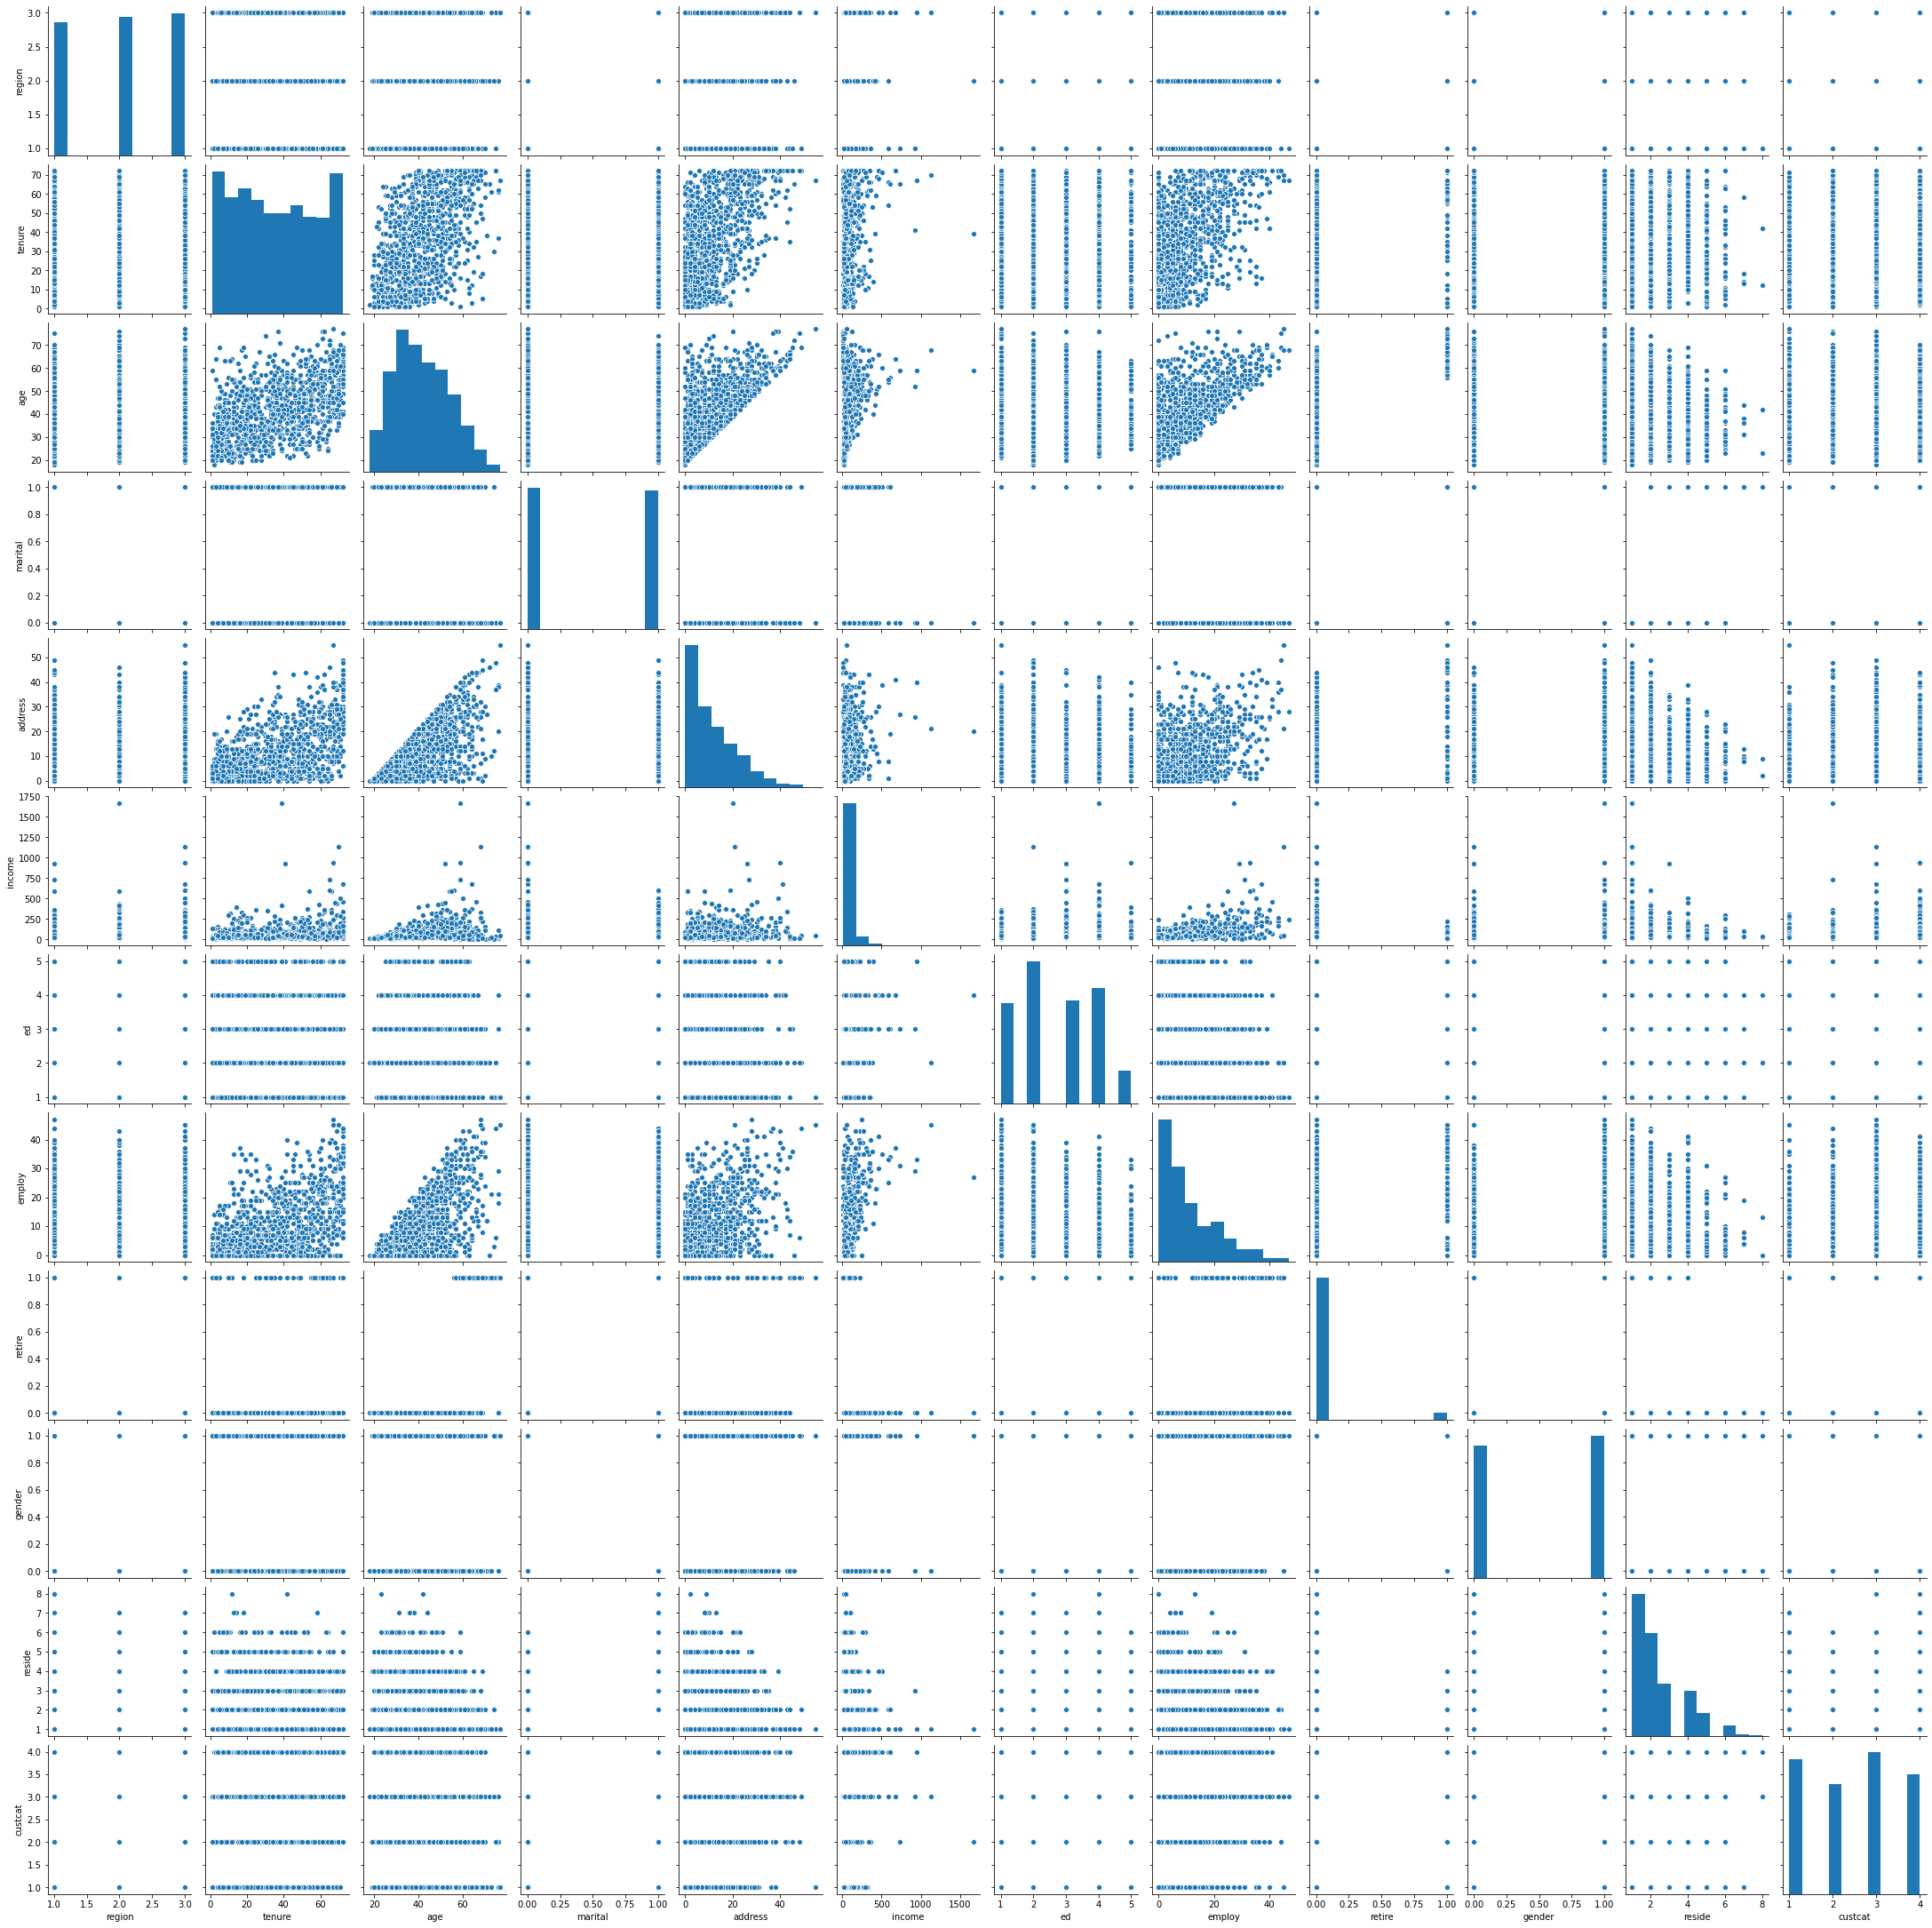

In [8]:
sns.pairplot(tele)

### Check Income using histogram with 50 Bin

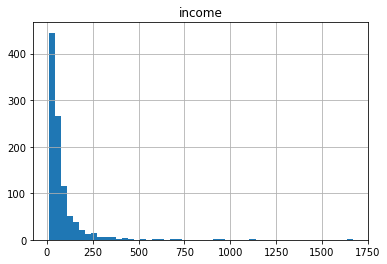

In [9]:
tele.hist('income', bins=50)
plt.show()

### Feature set - 

Lets define feature sets, X:

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [10]:
tele.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [11]:
x=tele[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values
x

array([[ 2, 13, 44, ...,  0,  0,  2],
       [ 3, 11, 33, ...,  0,  0,  6],
       [ 3, 68, 52, ...,  0,  1,  2],
       ...,
       [ 3, 67, 59, ...,  0,  1,  1],
       [ 3, 70, 49, ...,  0,  1,  1],
       [ 3, 50, 36, ...,  0,  1,  3]], dtype=int64)

What are our labels?

In [12]:
y=tele[['custcat']].values
y

array([[1],
       [4],
       [3],
       [1],
       [3],
       [3],
       [2],
       [4],
       [3],
       [2],
       [1],
       [3],
       [1],
       [4],
       [1],
       [2],
       [3],
       [3],
       [1],
       [4],
       [2],
       [1],
       [4],
       [1],
       [3],
       [3],
       [4],
       [3],
       [1],
       [2],
       [2],
       [4],
       [3],
       [2],
       [4],
       [2],
       [4],
       [3],
       [3],
       [3],
       [3],
       [3],
       [1],
       [4],
       [3],
       [2],
       [2],
       [4],
       [1],
       [3],
       [1],
       [2],
       [4],
       [1],
       [1],
       [1],
       [2],
       [1],
       [3],
       [2],
       [3],
       [4],
       [1],
       [4],
       [4],
       [1],
       [3],
       [3],
       [1],
       [1],
       [1],
       [2],
       [1],
       [2],
       [3],
       [1],
       [3],
       [1],
       [3],
       [4],
       [4],
       [1],
       [4],
    

## Normalize Data -  

Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:

In [13]:
from sklearn.preprocessing import StandardScaler
x_scaler= StandardScaler('tele').fit(x).transform(x)
x_scaler

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass copy=tele as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

### Train Test split - 


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_scaler,y, test_size=0.2,random_state=42)

In [15]:
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (800, 11) (800, 1)
Test set: (200, 11) (200, 1)


<div id="classification">
    <h2>Classification</h2>
</div>

<h3> Build a K nearest neighbor (KNN) - 

#### Import library 

Classifier implementing the k-nearest neighbors vote.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

### Training

Lets start the algorithm with k=4 for now:

In [17]:
knn=KNeighborsClassifier(n_neighbors=4).fit(x_train,y_train)
knn

<ipython-input-17-b667d2d6deed>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn=KNeighborsClassifier(n_neighbors=4).fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=4)

### Predicting
we can use the model to predict the test set:

In [18]:
ypred=knn.predict(x_test)

### Accuracy evaluation


In [19]:
from sklearn import metrics
predacc = metrics.accuracy_score(y_train, knn.predict(x_train))
predacc

0.54375

In [20]:
actualacc=metrics.accuracy_score(y_test,ypred)
actualacc

0.325

### Build a Knn model with various K value and Decide the best K value 

In [27]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    ypred=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, ypred)

    
    std_acc[n-1]=np.std(ypred==y_test)/np.sqrt(ypred.shape[0])

mean_acc

<ipython-input-27-93482a4a6517>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
<ipython-input-27-93482a4a6517>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
<ipython-input-27-93482a4a6517>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
<ipython-input-27-93482a4a6517>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClassifie

array([0.29 , 0.34 , 0.365, 0.325, 0.33 , 0.33 , 0.33 , 0.335, 0.33 ])

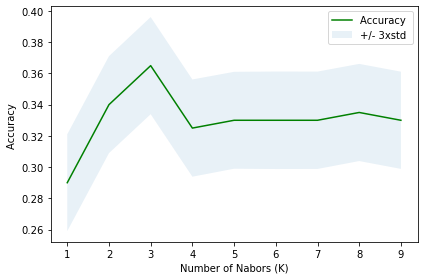

In [28]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [29]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.365 with k= 3
